<a href="https://colab.research.google.com/github/Adarshsinghparihar/Corona_detection_x-ray_Effat-University/blob/master/Week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/covid-19/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#VGG 16


In [ ]:
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.layers import Input

In [ ]:
# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-3
EPOCHS = 10
BS = 50

In [ ]:
# lb = LabelBinarizer()
# labels = lb.fit_transform(y)
# labels = to_categorical(y)
y = to_categorical(y, num_classes=2)  

In [ ]:
(trainX, testX, trainY, testY) = train_test_split(X,y,
	test_size=0.05, random_state=42)

In [ ]:
# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing


# initialize the training data augmentation object
# # trainAug = ImageDataGenerator(
# 	rotation_range=15,
# 	fill_mode="nearest")

# load the VGG16 network, ensuring the head FC layer sets are left
# off
# baseModel = VGG16(weights="/content/drive/My Drive/Covid-19 project/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5", include_top=False,
# 	input_tensor=Input(shape=(224, 224, 3)))

baseModel = VGG16(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
# headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
# headModel = Flatten(name="flatten")(headModel)
# headModel = Dense(128, activation="relu")(headModel)
# headModel = Dropout(0.4)(headModel)
# headModel = Dense(2, activation="softmax")(headModel)
headModel = GlobalAveragePooling2D()(headModel)
headModel = Dense(128, activation='relu')(headModel)
predictions = Dense(2, activation='softmax')(headModel)


# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=predictions)

# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
	layer.trainable = False

# compile our model
print("[INFO] compiling model...")
opt=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])

# checkpoint_path = "training_1/cp.ckpt"
# checkpoint_dir = os.path.dirname(checkpoint_path)

# # Create a callback that saves the model's weights
# cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
#                                                  save_weights_only=True,
#                                                  verbose=1)


# train the head of the network
print("[INFO] training head...")
# H = model.fit_generator(
# 	trainAug.flow(trainX, trainY, batch_size=BS),
# 	steps_per_epoch=len(trainX) // BS,
# 	validation_data=(testX, testY),
# 	validation_steps=len(testX) // BS,
# 	epochs=EPOCHS
# 	callbacks = [cp_callback])

history= model.fit(trainX, trainY, epochs=10, verbose=1, validation_split=0.1)



[INFO] compiling model...
[INFO] training head...
Epoch 1/10
51/51 [==============================] - 16s 312ms/step - loss: 0.2780 - accuracy: 0.8868 - val_loss: 0.1157 - val_accuracy: 0.9553
Epoch 2/10
51/51 [==============================] - 16s 307ms/step - loss: 0.0942 - accuracy: 0.9733 - val_loss: 0.0602 - val_accuracy: 0.9888
Epoch 3/10
51/51 [==============================] - 16s 307ms/step - loss: 0.0582 - accuracy: 0.9820 - val_loss: 0.0358 - val_accuracy: 0.9888
Epoch 4/10
51/51 [==============================] - 16s 307ms/step - loss: 0.0458 - accuracy: 0.9876 - val_loss: 0.0300 - val_accuracy: 0.9888
Epoch 5/10
51/51 [==============================] - 16s 308ms/step - loss: 0.0376 - accuracy: 0.9882 - val_loss: 0.0317 - val_accuracy: 0.9888
Epoch 6/10
51/51 [==============================] - 16s 308ms/step - loss: 0.0333 - accuracy: 0.9913 - val_loss: 0.0398 - val_accuracy: 0.9888
Epoch 7/10
51/51 [==============================] - 16s 308ms/step - loss: 0.0308 - accuracy

In [ ]:
score = model.evaluate(testX,testY, verbose=0)
print('\nKeras CNN - accuracy:', score[1], '\n')
y_pred = model.predict(testX)
# print('\n', sklearn.metrics.classification_report(np.where(ytest > 0)[1], np.argmax(y_pred, axis=1), target_names=list(labels.values())), sep='') 


Keras CNN - accuracy: 0.9684210419654846 



In [ ]:
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

# show a nicely formatted classification report
# print(classification_report(testY.argmax(axis=1), predIdxs,
	# target_names=lb.classes_))

# compute the confusion matrix and and use it to derive the raw
# accuracy, sensitivity, and specificity
cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig(args["plot"])

# serialize the model to disk
print("[INFO] saving COVID-19 detector model...")
model.save(args["model"], save_format="h5")

[INFO] evaluating network...
[[81  1]
 [ 2 11]]
acc: 0.9684
sensitivity: 0.9878
specificity: 0.8462


NameError: ignored

<Figure size 432x288 with 0 Axes>

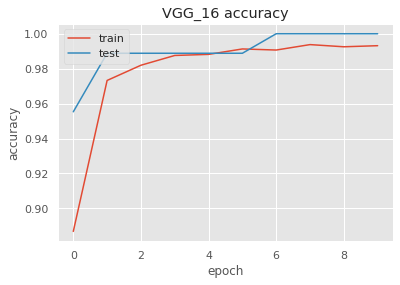

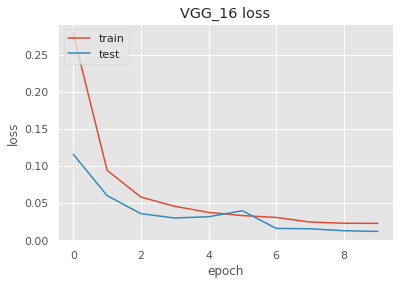

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('VGG_16 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('VGG_16 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
score_model = model.evaluate(x=testX, y=testY)

3/3 [==============================] - 1s 186ms/step - loss: 0.1481 - accuracy: 0.9684


In [ ]:
met = list(zip(model.metrics_names, score_model))
print('Scores for test set:')
print('{}: {:.4f}'.format(met[0][0], met[0][1]))
print('{}: {:.4f}'.format(met[1][0], met[1][1]))

Scores for test set:
loss: 0.1481
accuracy: 0.9684


In [ ]:
print('Average scores for all epochs:')
print('accuracy: {:.4f} (+- {:.4f})'.format(np.mean(history.history['accuracy']), np.std(history.history['accuracy'])))
print('loss: {:.4f}'.format(np.mean(history.history['loss'])))

Average scores for all epochs:
accuracy: 0.9779 (+- 0.0309)
loss: 0.0648


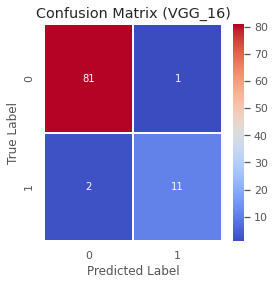

In [ ]:
y_pred_test = model.predict(testX)
confmat = confusion_matrix(testY.argmax(axis=1),y_pred_test.argmax(axis=1))

#Plot Confusion Matrix 
plt.figure(figsize=(4,4))
sns.heatmap(confmat, cmap='coolwarm', linecolor='white', linewidths=1, annot=True, fmt='d')
plt.title('Confusion Matrix (VGG_16)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
fig = plt.gcf()
fig.savefig('Confusion-Matrix-(VGG_16).png');
plt.show();

In [ ]:
import cv2
from PIL import Image
from os import listdir
import skimage
from skimage.transform import resize
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import os

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix

In [ ]:
def get_data(folder, X=[], y=[]):
 
  for folderName in listdir(folder)[:2]:
    # print(folderName) - used for debugging purposes
    if not folderName.startswith('.') and not folderName.endswith('.ipynb'): # to not consider .DS_Store and .ipynb files
      if folderName in ['normal']:
        label = 0
      elif folderName in ['corona']:
        label = 1
      # elif folderName in ['normal']:
        # label = 2 # for all other types of pnuemonia - label 2 is to be used later on
      # print(label) - used for debugging purposes
      for image_filename in tqdm(listdir(folder + folderName)):
        img_file = cv2.imread(folder + folderName + '/' + image_filename)
        if img_file is not None:
          img_file = skimage.transform.resize(img_file, (224, 224, 3))
          img_arr = np.asarray(img_file)
          X.append(img_arr)
          y.append(label)
  X = np.asarray(X)
  y = np.asarray(y)
  return X,y


In [ ]:
X,y = get_data(path)
print(len(X), len(y))


100%|██████████| 1595/1595 [08:19<00:00,  3.19it/s]


In [ ]:
y = to_categorical(y, num_classes=2)  
X_train, X_test, y_train, y_test = train_test_split(*shuffle(X, y), test_size=0.1, random_state=1234)

# Model 1


In [ ]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint
# from tensorflow.keras.callbacks import ModelCheckpoint

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (224,224,3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 2, activation = 'sigmoid'))


# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
print(classifier.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 26, 26, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 21632)            

In [ ]:

# checkpoint_path = "model_1.ckpt"
# checkpoint_dir = os.path.dirname(checkpoint_path)

# # Create a callback that saves the model's weights
# cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
#                                                  save_weights_only=True,
#                                                  verbose=1)

history= classifier.fit(X_train, y_train, epochs=10, verbose=1, validation_split=0.1,shuffle = True)

Train on 1523 samples, validate on 170 samples
Epoch 1/10
1523/1523 [==============================] - 10s 7ms/step - loss: 0.2606 - accuracy: 0.9025 - val_loss: 0.2731 - val_accuracy: 0.9294
Epoch 2/10
1523/1523 [==============================] - 3s 2ms/step - loss: 0.0774 - accuracy: 0.9721 - val_loss: 0.2672 - val_accuracy: 0.9206
Epoch 3/10
1523/1523 [==============================] - 3s 2ms/step - loss: 0.0505 - accuracy: 0.9800 - val_loss: 0.0957 - val_accuracy: 0.9706
Epoch 4/10
1523/1523 [==============================] - 3s 2ms/step - loss: 0.0478 - accuracy: 0.9862 - val_loss: 0.3592 - val_accuracy: 0.8882
Epoch 5/10
1523/1523 [==============================] - 3s 2ms/step - loss: 0.0890 - accuracy: 0.9698 - val_loss: 0.1161 - val_accuracy: 0.9618
Epoch 6/10
1523/1523 [==============================] - 3s 2ms/step - loss: 0.0475 - accuracy: 0.9810 - val_loss: 0.1148 - val_accuracy: 0.9647
Epoch 7/10
1523/1523 [==============================] - 3s 2ms/step - loss: 0.0365 - acc

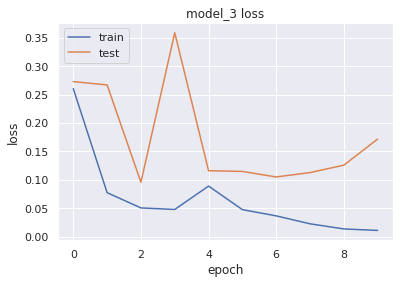

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_3 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

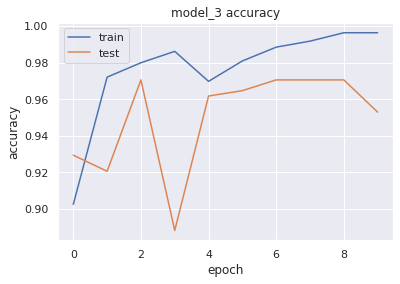

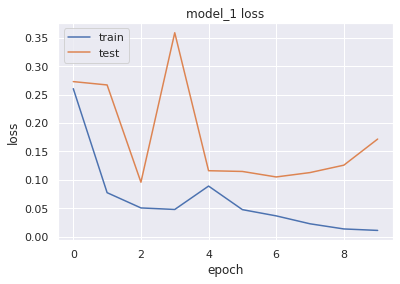

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_3 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
import keras
y_pred_test = classifier.predict(X_test)
print('Score test: ', classifier.evaluate(X_test, y_test))


189/189 [==============================] - 0s 948us/step
Score test:  [0.047061153189845814, 0.9735449552536011]


In [ ]:
BS= 32
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = classifier.predict(X_test)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

# show a nicely formatted classification report
# print(classification_report(y_test.argmax(axis=1), predIdxs,
	# target_names=lb.classes_))

# compute the confusion matrix and and use it to derive the raw
# accuracy, sensitivity, and specificity
cm = confusion_matrix(y_test.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))


[INFO] evaluating network...
[[157   3]
 [  2  27]]
acc: 0.9735
sensitivity: 0.9812
specificity: 0.9310


In [ ]:
print(history.history['loss'])
print(history.history['accuracy'])

[0.2272319290288886, 0.07499084472702584, 0.06299725269426161, 0.06166250388999817, 0.1894335169831652, 0.06701583516742311, 0.04345411010346009, 0.04264272380254199, 0.02087045601911991, 0.019413405022148358, 0.014248731765323852, 0.008134581121113336, 0.005923063213158819, 0.004830541986827196, 0.0032461814670347137]
[0.9023632, 0.97139305, 0.97699004, 0.97761196, 0.9421642, 0.9726368, 0.98507464, 0.9844527, 0.9925373, 0.994403, 0.99502486, 0.9981343, 0.99875623, 0.99875623, 0.99875623]


In [ ]:
score_model = classifier.evaluate(x=X_test, y=y_test)

189/189 [==============================] - 0s 1ms/step


In [ ]:
met = list(zip(classifier.metrics_names, score_model))
print('Scores for test set:')
print('{}: {:.4f}'.format(met[0][0], met[0][1]))
print('{}: {:.4f}'.format(met[1][0], met[1][1]))

Scores for test set:
loss: 0.0471
accuracy: 0.9735


In [ ]:
print('Average scores for all epochs:')
print('accuracy: {:.4f} (+- {:.4f})'.format(np.mean(history.history['accuracy']), np.std(history.history['accuracy'])))
print('loss: {:.4f}'.format(np.mean(history.history['loss'])))

Average scores for all epochs:
accuracy: 0.9765 (+- 0.0261)
loss: 0.0656


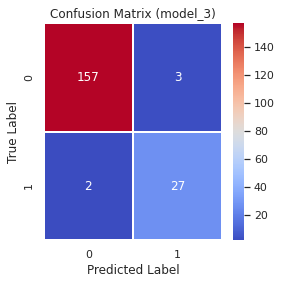

In [ ]:
y_pred_test = classifier.predict(X_test)
confmat = confusion_matrix(y_test.argmax(axis=1),y_pred_test.argmax(axis=1))

#Plot Confusion Matrix 
plt.figure(figsize=(4,4))
sns.heatmap(confmat, cmap='coolwarm', linecolor='white', linewidths=1, annot=True, fmt='d')
plt.title('Confusion Matrix (model_3)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
fig = plt.gcf()
fig.savefig('Confusion-Matrix-(model_1).png');
plt.show();